<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Diamond-Mortensen-Pissarides-(DMP)-Model" data-toc-modified-id="Diamond-Mortensen-Pissarides-(DMP)-Model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Diamond-Mortensen-Pissarides (DMP) Model</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Code-Implementation" data-toc-modified-id="Code-Implementation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Code Implementation</a></span><ul class="toc-item"><li><span><a href="#Instantiate-model-class" data-toc-modified-id="Instantiate-model-class-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Instantiate model class</a></span><ul class="toc-item"><li><span><a href="#Certainty-equivalent-steady-state-equilibrium" data-toc-modified-id="Certainty-equivalent-steady-state-equilibrium-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Certainty-equivalent steady state equilibrium</a></span></li></ul></li><li><span><a href="#Instantiate-TASMANIAN-sparse-grids" data-toc-modified-id="Instantiate-TASMANIAN-sparse-grids-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Instantiate TASMANIAN sparse grids</a></span></li><li><span><a href="#Initial-guess" data-toc-modified-id="Initial-guess-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Initial guess</a></span></li><li><span><a href="#Time-iteration-solution" data-toc-modified-id="Time-iteration-solution-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Time iteration solution</a></span></li><li><span><a href="#Plot-solutions" data-toc-modified-id="Plot-solutions-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Plot solutions</a></span></li><li><span><a href="#Error-analysis" data-toc-modified-id="Error-analysis-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Error analysis</a></span></li><li><span><a href="#Impulse-response-function-(deterministic)" data-toc-modified-id="Impulse-response-function-(deterministic)-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Impulse response function (deterministic)</a></span></li><li><span><a href="#Impulse-response-(stochastic)" data-toc-modified-id="Impulse-response-(stochastic)-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Impulse response (stochastic)</a></span></li><li><span><a href="#Business-cycle-statistics" data-toc-modified-id="Business-cycle-statistics-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Business-cycle statistics</a></span><ul class="toc-item"><li><span><a href="#Quarterly-averaging" data-toc-modified-id="Quarterly-averaging-3.9.1"><span class="toc-item-num">3.9.1&nbsp;&nbsp;</span>Quarterly averaging</a></span></li><li><span><a href="#De-mean-the-data" data-toc-modified-id="De-mean-the-data-3.9.2"><span class="toc-item-num">3.9.2&nbsp;&nbsp;</span>De-mean the data</a></span></li><li><span><a href="#HP-filter-quarterly-series" data-toc-modified-id="HP-filter-quarterly-series-3.9.3"><span class="toc-item-num">3.9.3&nbsp;&nbsp;</span>HP filter quarterly series</a></span></li><li><span><a href="#Statistics---volatility" data-toc-modified-id="Statistics---volatility-3.9.4"><span class="toc-item-num">3.9.4&nbsp;&nbsp;</span>Statistics - volatility</a></span></li><li><span><a href="#Statistics---comovement" data-toc-modified-id="Statistics---comovement-3.9.5"><span class="toc-item-num">3.9.5&nbsp;&nbsp;</span>Statistics - comovement</a></span></li><li><span><a href="#Statistics---persistence" data-toc-modified-id="Statistics---persistence-3.9.6"><span class="toc-item-num">3.9.6&nbsp;&nbsp;</span>Statistics - persistence</a></span></li></ul></li></ul></li><li><span><a href="#Postscript" data-toc-modified-id="Postscript-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Postscript</a></span></li></ul></div>

[Timothy Kam](https://github.com/phantomachine/)

# Diamond-Mortensen-Pissarides (DMP) Model

* This notebook demonstrates the use of the Python wrapper to ``TASMANIAN`` (a ``C++`` library [from the Oak Ridge National Laboratory](https://tasmanian.ornl.gov/)).

* This application: A version of the DMP model (in Hagedorn and Manovskii) solved using a global method (Petrosky-Nadeau and Zhang).

In [65]:
%matplotlib notebook

# Model

The recursive equilibrium of the model is characterized by equations (3) to (11) in [Petrosky-Nadeau and Zhang](https://doi.org/10.3982/QE452) ("PNZ").

These are reproduced below as:

* A forward-looking job creation condition (Euler equation): \eqref{eq: Euler-JC}
* A backward-looking evolution of employment: \eqref{eq: Bathtub}
* Nash bargaining wage solution: \eqref{eq: WS}
* Vacancy posting cost: \eqref{eq: Vacancy posting cost}
* Exogenous AR(1) log-productivity process: \eqref{eq: Productivity}
* Vacancy non-negativity constraint (Kuhn-Tucker complementarity slackness conditions): \eqref{eq: KKT}

Let $\mathbb{E}_{t}$ denote the conditional expectations operator. This is with respect to the Markov kernel associate with the exogenous AR(1) log-productivity process in \eqref{eq: Productivity}:
\begin{equation*}
\mathbb{E}_{t}(Y_{t+1}) = \int Y(X_{t+1}) Q(x_{t}, dX_{t+1}).
\end{equation*}

\begin{equation}
\frac{\kappa_t}{q(\theta_t)} - \lambda_t 
= \beta \mathbb{E}_{t} 
    \left[
    \left(X_{t + 1} - W_{t + 1} \right) 
    +(1 - s) 
    \left(\frac{\kappa_{t + 1}}{q(\theta_{t + 1})} - \lambda_{t + 1} \right) 
    \right]
\label{eq: Euler-JC}
\end{equation}

\begin{equation}
N_{t + 1} = (1 - s)N_t + q(\theta_t)V_t
\label{eq: Bathtub}
\end{equation}

\begin{equation}
W_t = \eta \left(X_t + \kappa_t \theta_t\right) + \left(1 - \eta \right)b
\label{eq: WS}
\end{equation}

\begin{equation}
\kappa_t = \kappa_K X_t + \kappa_W X_t^{\xi} \quad \kappa_K, \kappa_W, \xi >0
\label{eq: Vacancy posting cost}
\end{equation}

\begin{equation}
\ln(X_{t + 1}) = \rho \ln(X_t) + \sigma \epsilon_{t + 1}, \ \  \epsilon \sim N(0, 1)
\label{eq: Productivity}
\end{equation}


\begin{equation}
\lambda_t q(\theta_t) V_t = 0, \lambda_t \geq 0, q(\theta_t)V_t \geq 0
\label{eq: KKT}
\end{equation}




Observe that in this example, the Euler equation \eqref{eq: Euler-JC} is independent of the natural state variable $N_{t}$.

This is an artefact of two things:

1. Production is linear in labor so that the marginal product of labor, and thus the wage bargaining outcome \eqref{eq: WS}, is constant with respect to $N$.

2. Agents do not derive utility from leisure, so that in the wage bargaining outcome \eqref{eq: WS}, their marginal rate of subtitution between consumption and leisure is independent of $N$.

This makes the fixed-point solution of the only forward-looking part of the model a function of only productivity $X$.

We solve for the fixed point (via a change of variables) in terms of the RHS expectation function:

\begin{equation}
e(X) = \beta \mathbb{E}_{t}\left[\left(X_{t + 1} - W_{t + 1} \right) +(1 - s) \left(\frac{\kappa_{t + 1}}{q(\theta_{t + 1})} - \lambda_{t + 1} \right) \right].
\label{eq: efun}
\end{equation}

From this we recover the equilibrium market tightness and Lagrange multiplier functions: $X \mapsto (\theta, \lambda)(X)$.

The main solution method ``PEA_deterministic`` is found in the class file ``hmdmp``.

# Code Implementation

In our method below, we adapt the non-stochastic PEA method of Christiano and Fisher (2000, JEDC). 

However, we perform function interpolation and quadrature integration on sparse grids using local polynomials (i.e., finite-element method) as in Brumm and Scheidegger (2017, ECTA).

A follow-up notebook will also consider adaptive sparse-grid refinements. 

We show how all the methods proposed in Brumm and Scheidegger (2017, ECTA) can be readily implemented using the ``TASMANIAN`` library.

In [2]:
# List directory content: make sure you have class file hmdmp.py
%ls

Mortensen-Pissarides S&M Model.ipynb*
Petrosky-Nadeau-Zhang Revisits Hagedorn-Manovskii DMP.html*
Petrosky-Nadeau-Zhang Revisits Hagedorn-Manovskii DMP.ipynb*
Petrosky-Nadeau_Zhang-Solving_DMP_Accurately_QE2017.pdf*
README.md*
__pycache__/
hmdmp-discrete.py*
hmdmp.py*
hmdmp_v0.py*
hmdmp_v1.py*
main.py*


We'll need to import the custom model class ``hmdmp`` and other tools needed:

In [3]:
from hmdmp import hmdmp as hm
import time
import numpy as np
from matplotlib import cm
from mpl_toolkits import mplot3d
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
import pandas as pd
from scipy.stats import truncnorm, norm
import statsmodels.api as sm
import seaborn as sns

You can find out more about this ``hmdmp`` class by:

* typing its name followed by a dot ``.``, and, 
* hit the ``tab`` key to see its attributes.

For even more information on a particular ``attribute_name``, type ``hm.attribute_name??`` like so:

In [4]:
# hm.PEA_deterministic??

## Instantiate model class

Create a parametric instance of the model.

In [5]:
model = hm( 
            e_min_scalelog=-4.2, 
            e_max_scalelog=4.2,  
            MAXITER = 10000,
           )

**Notes**: 

The ``e_min_scalelog`` and ``e_max_scalelog`` (in absolute terms) correspond to the $z$-score scaling parameter (for a Gaussian distribution).

* If the shock distribution were Gaussian with mean and variance of $(0,\sigma^{2})$, then the $z$-score gives us $z_{score} \times \sigma$ deviations from the zero mean.

* In Petrosky-Nadeau and Zhang, they set this to $\pm 4.0$.

* (Here, since I use a truncated log-Normal, instead of Normal, distribution for the underlying shocks, I have to fudge with this $z$-score a bit to get a similar solution function below.)

This gives us the implied bounds on the (exogenous) *relevant-state* space of productivity $x$:

In [6]:
model.bounds_exo

array([[0.90592292, 1.10384667]])

Or, in terms of $\ln(x)$:

In [7]:
np.log(model.bounds_exo)

array([[-0.09880106,  0.09880106]])

### Certainty-equivalent steady state equilibrium

We calculate the non-stochastic steady state equilibrium using the ``SteadyState()`` method:

In [8]:
# Get DICT of steady-state values
dict_ss = model.SteadyState()

In [9]:
# From DICT to Pandas table
df_ss = pd.DataFrame.from_dict(dict_ss, orient="index", columns=["Steady-state Value"])

In [10]:
df_ss

,Steady-state Value
technology,1.000000
tightness,0.370673
employment,0.928697
unemployment,0.071303
vacancy,0.026430
multiplier,0.000000
wage,0.968597
output,0.928697


## Instantiate TASMANIAN sparse grids

We'll need to also instantiate the sparse grid schemes.

1. ``grid_all``: for interpolating functions on state space $X$, and, 

2. ``grid_exo``: for evaluating integrals (expectation) of future random variables with respect to the distribution $Q(z, \cdot)$ of future exogenous states $Z_{+}$.

These are created as ``TASMANIAN`` objects.

In [11]:
# Example: See what's on the menu 
# - global projection/quadrature schemes
import Tasmanian
Tasmanian.lsTsgGlobalRules

['clenshaw-curtis',
 'clenshaw-curtis-zero',
 'chebyshev',
 'chebyshev-odd',
 'gauss-legendre',
 'gauss-legendre-odd',
 'gauss-patterson',
 'leja',
 'leja-odd',
 'rleja',
 'rleja-odd',
 'rleja-double2',
 'rleja-double4',
 'rleja-shifted',
 'rleja-shifted-even',
 'rleja-shifted-double',
 'max-lebesgue',
 'max-lebesgue-odd',
 'min-lebesgue',
 'min-lebesgue-odd',
 'min-delta',
 'min-delta-odd',
 'gauss-chebyshev1',
 'gauss-chebyshev1-odd',
 'gauss-chebyshev2',
 'gauss-chebyshev2-odd',
 'fejer2',
 'gauss-gegenbauer',
 'gauss-gegenbauer-odd',
 'gauss-jacobi',
 'gauss-jacobi-odd',
 'gauss-laguerre',
 'gauss-laguerre-odd',
 'gauss-hermite',
 'gauss-hermite-odd',
 'custom-tabulated']

In [12]:
projmethod = "chebyshev"

In [13]:
if projmethod=="chebyshev":
    # Global projection on Chebyshev bases 
    # as in P-Nadeau and Zhang
    grid_all = model.MakeAllPolyGrid(Depth=33, 
                                 Order=12, 
                                 sRule=projmethod)
elif projmethod =="localp":
    # Finite-element. Piecewise local poly bases.
    grid_all = model.MakeAllPolyGrid(Depth=5, 
                                 Order=1, 
                                 sRule=projmethod)

In [14]:
# c.f. PNZ, we use a truncated log-normal distro
# quadrature based on finite elements
grid_exo = model.MakeExoPolyGrid(Depth=5, 
                                 Order=1, 
                                 sRule="localp")

## Initial guess

Define an initial guess of the solution (expectation) function. Default uses a close-by model which has analytical solution (informal homotopy).

In [15]:
# efun_init = model.getInitialGuess(grid_all)
χ = 23.18875328038525
c = -20.
efun_init = c + χ*grid_all.getPoints()

In [16]:
xscale = "level" # "log" | "level"

plt.figure()
if xscale == "log":
    x = np.log(grid_all.getPoints())
else:
    x = grid_all.getPoints()
y = efun_init
plt.plot(x, y, 'o')
# plt.xscale("log")
plt.xlabel(r"$\ln(Z)$")
plt.title("Expectation Function (Initial Guess)")
plt.show(block=False)

<IPython.core.display.Javascript object>

## Time iteration solution

Solve the model by time iteration on the PEA algorithm.

In [17]:
tic = time.time()
model.TOL_value = 1e-6
efun, θ, λ = model.Solve_PEA_TimeIteration(grid_all, grid_exo,
                                                    efun_old=efun_init)
toc = time.time() - tic
print("\n\nElapsed time:", toc, "seconds")


****** Solve_PEA_TimeIteration ***********************

For function interpolations
----------------------------------
	Rule: chebyshev
	Interpolation Nodes: 34
	Local Polynomial basis (Finite-Element Method)? False
	Global Polynomial basis (Weighted Residuals Method)? True
	Interpolation Nodes: 34
	Max. order of polynomials: -1

For quadrature/integration
----------------------------------
	Rule: localp
	Interpolation Nodes: 33
	Local Polynomial basis (Finite-Element Method)? True
	Global Polynomial basis (Weighted Residuals Method)? False
	Interpolation Nodes: 33
	Max. order of polynomials: 1

		請稍微等一下 ...
		தயவுசெய்து ஒரு கணம் காத்திருங்கள் ...
		しばらくお待ちください ...
		Please wait ...

[ =-------------- ] 4.44% 444/10000, error = 0.0000009783    
Solve_PEA_TimeIteration: Convergence w.r.t. TOL_value attained.


Elapsed time: 158.08178520202637 seconds


## Plot solutions

Visualize the solution functions.

In [18]:
def plotfun(x_restrict, policy_restrict, 
            xi, yi, 
            x_grid, policy,
            λi,
            ytitle=r"$\theta$",
            plotmultiplier=False,
           ):
    
    fig, ax = plt.subplots()

    # Restricted solution graph
    plt.plot(x, policy_restrict, 'o', label="Restricted")
    
    # Interpolated, restricted solution graph
    plt.plot(xi, yi, '-b', label="Fitted, Restricted")

    # Solution graph
    plt.plot(x_grid, policy, 'xr', label="Full")
    
    # Use a less-precise tolerance for zero
    ε = min(1000.*model.TOL_value, 0.001)
    x_cutoff = xi[λi > ε].max()
    
    # Numerical region of binding constraint
    width = x_cutoff - xmin
    height = policy.max()
    bindbox = patches.Rectangle((xmin, 0.0), 
                             width, 
                             height, 
                             edgecolor = 'magenta',
                             facecolor = 'magenta',
                             fill=True,
                             alpha=0.1,
                            label=r"$V = 0$"
                           )
    ax.add_patch(bindbox)

    # PNZ's restriction to +ve e's region
    width = xmax - xmin
    box = patches.Rectangle(
                         (xmin, 0.0), 
                         width, 
                         height, 
                         edgecolor = 'black',
                         facecolor = 'white',
                         fill=True,
                         alpha=0.5,
                         label=r"$\pm$"+str(zscore)
                               +r"$\times \sigma$"
                            )
    ax.add_patch(box)
    
    

    plt.legend()
    plt.xlabel(r"$x$")
    plt.ylabel(ytitle)
    plt.show(block=False)

Petrosky-Nadeau and Zhang only report the solution functions over the subdomain defined by a $z$-score of $z_{score} = \pm 3.4645$ standard deviations (s.d.) around the zero mean of log TFP, $x = \ln(X)$. 

We'll reproduce the same ex-post hack that the authors used. 

Note that the unconditional s.d. of $x$ is given by
\begin{equation*}
\sigma_{x} := \sqrt{var(x)} = \frac{\sigma}{\sqrt{1-\rho^{2}}} 
\end{equation*}

So the subset of the state space of interest is $\pm z_{score} \times \sigma_{x}$.

In [19]:
zscore = 3.4645
xmax = 1.0*zscore*model.σ/np.sqrt(1.0-model.ρ**2.0)
xmin = -xmax

In [20]:
xmin, xmax

(-0.08149910912246086, 0.08149910912246086)

Get the sparse grid representation of the state space:

In [21]:
X_grid = grid_all.getPoints()
x_grid = np.log(X_grid.flatten())

Get the graph of the solution functions $(\theta, e, \lambda)$ restricted to the said subdomain:

In [22]:
# Restricted grid
bool = (x_grid <= xmax)
xres = x_grid[bool]

# Restricted grid, function values
θres, eres, λres = θ[bool], efun.flatten()[bool], λ[bool]

# More restrictions
xlb = xres.min()
x = xres[xres >= xlb]
θx, ex, λx = θres[xres >= xlb], eres[xres >= xlb], λres[xres >= xlb]

Interpolate on (open subset of) restricted subdomain:

In [23]:
# Spline, first-order
θresfit = interpolate.interp1d(x,θx,kind="slinear")
eresfit = interpolate.interp1d(x,ex,kind="slinear")
λresfit = interpolate.interp1d(x,λx,kind="slinear")

# Generate dense data
xi = np.linspace(x.min(), x.max(), 100)

# Evaluate interpolant on xi
θi = θresfit(xi)
ei = eresfit(xi)
λi = λresfit(xi)

Show it:

<IPython.core.display.Javascript object>


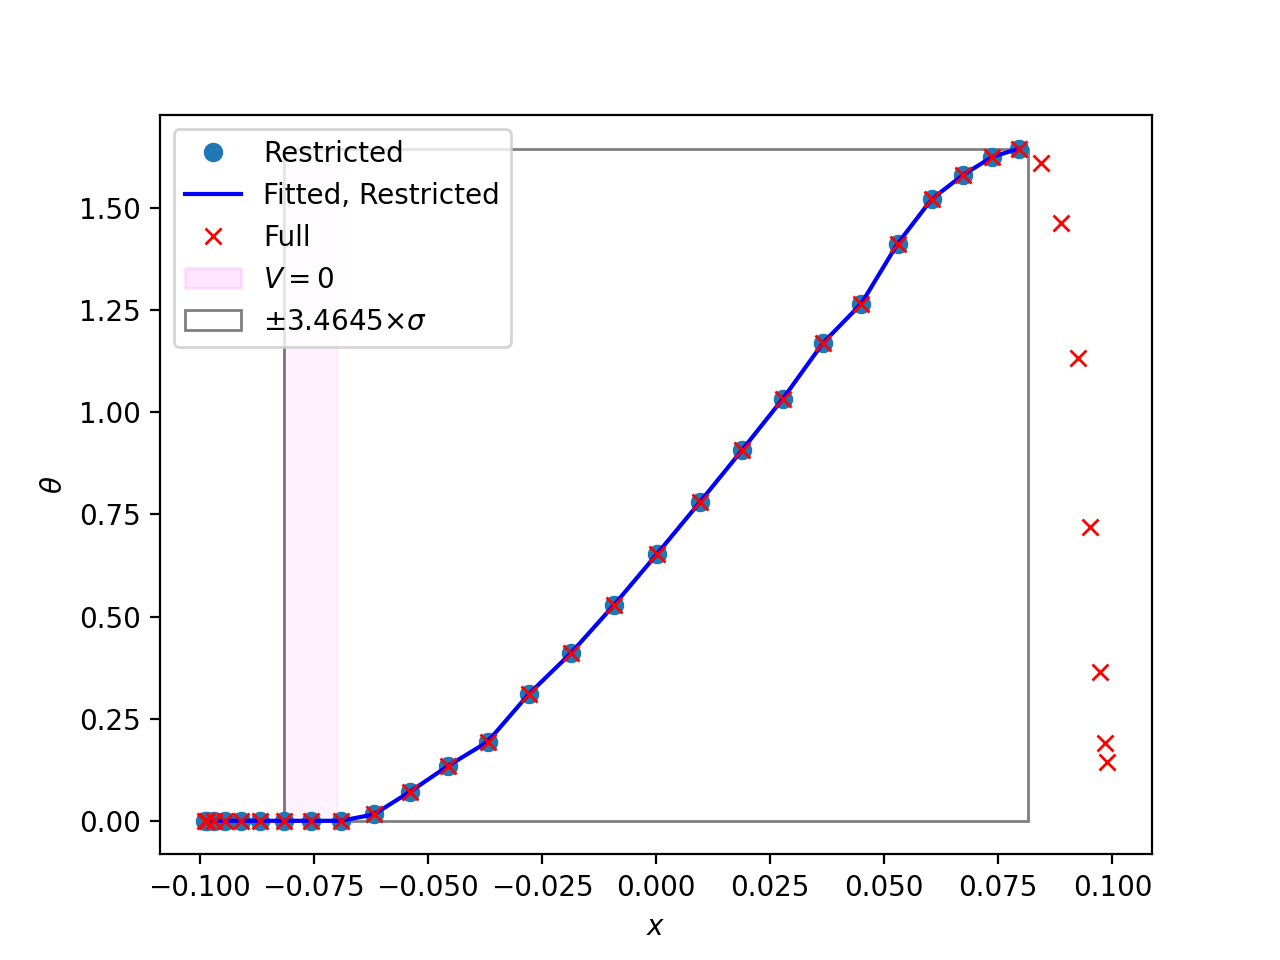

In [56]:
plotfun(x, θx,       # Restricted grid/graph
        xi, θi,      # Interpolated restricted graph
        x_grid, θ,   # Graph on full support
        λi,
        r"$\theta$", # title of graph
        )

Now we do the same with the numerical fixed-point, the expectation function:

<IPython.core.display.Javascript object>


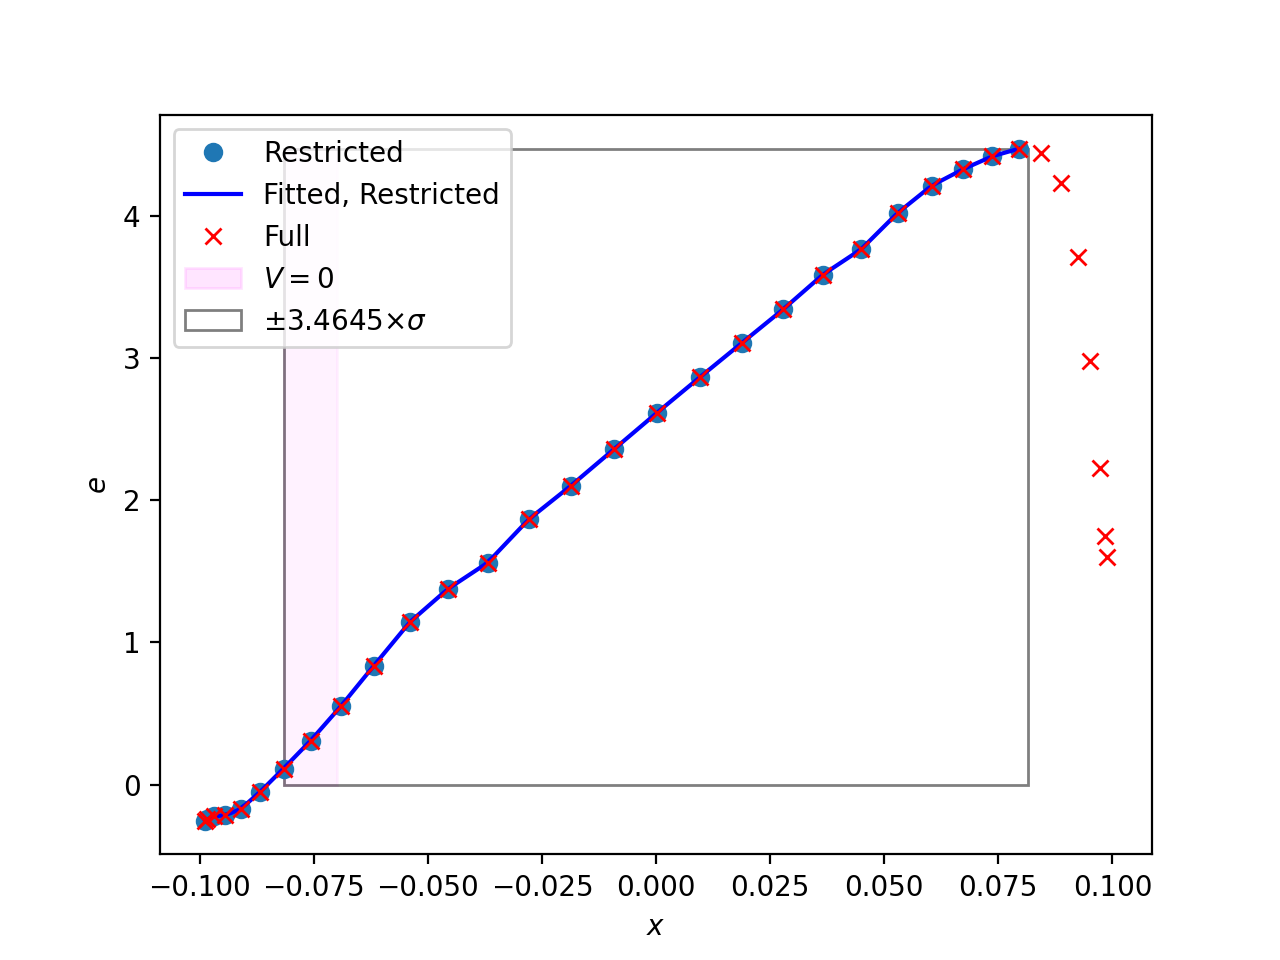

In [57]:
plotfun(x, ex,       # Restricted grid/graph
        xi, ei,      # Interpolated restricted graph
        x_grid, efun,# Graph on full support
        λi,
        r"$e$",      # title of graph
        )

Next, visualize the Lagrange multiplier function on the vancancies nonnegativity constraint:

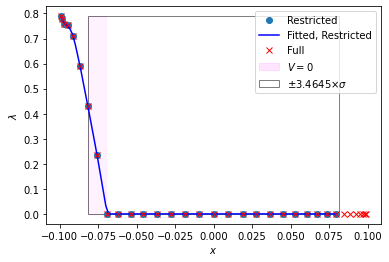

In [64]:
plotfun(x, λx,       # Restricted grid/graph
        xi, λi,      # Interpolated restricted graph
        x_grid, λ,   # Graph on full support
        λi,
        r"$\lambda$",# title of graph
        )

## Error analysis

Here we compute the one-step Euler equation error over a finer, regular mesh on the restricted state space.

In [27]:
# diagnosis = model.diagnostics_EulerError(grid_all, efun, C, mu)

Comment on errors ...

## Impulse response function (deterministic)

Visualize impulse response functions.

In [28]:
# Collect the interpolant objects into a DICT:
polfun = { "tightness"   : θresfit,
           "expectation" : eresfit,
           "multiplier"  : λresfit,
         }

From here on, we work with the restricted subspace of $\pm z_{score} \times \sigma_{x}$.

In [29]:
X = np.linspace(-xi.max(), xi.max(), 120)

Here's our Saville Row, custom-stitched ``ImpulseResponseFunction`` method:

In [30]:
def ImpulseResponseFunction(self, polfun, X, 
                                Horizon=16, 
                                shock_scale="sd", 
                                shock_date=0,
                                experiment="deterministic", 
                                Burn=1000,
                                PLOT=True,
                                irf_percent=False,
                                show_det_steady=False,
                                Display=False,
                                state_init=[],
                                variables=None,
                                seed=None,
                                ShockType="normal",
                               ):
    
    """Given recursive state-space system (solution)
    generate graph of one-time impulse response or
    general impulse responses to impulses every period."""
    
    if variables is None:
        variables = {
                "technology"   : [],
                "employment"   : [], 
                "tightness"    : [],
                "unemployment" : [],
                "vacancy"      : [], 
                "multiplier"   : [],
                "wage"         : [],
                "output"       : [],
            }
        
    if experiment=="deterministic":
        T = Horizon
    else:
        T = Burn + Horizon
    
    # Initialize state
    if not state_init:
        Zss = self.SteadyState()["technology"]
        Nss = self.SteadyState()["employment"]
        # Note: z must be log(Z)
        z, N = np.log(Zss), Nss
    else:
        z, N = state_init[0], state_init[1]
    
    # Shock series
    if experiment=="deterministic":
        ε = np.zeros(Horizon)
        ε[shock_date] = 1.0
    else:
        e_min = np.log(self.e_min)
        e_max = np.log(self.e_max)
        if ShockType=="truncnorm":
            ε = truncnorm.rvs(e_min, e_max, 
                              size=Burn+Horizon,
                              random_state=seed)
        elif ShockType=="normal":
            np.random.seed(seed)
            ε = np.random.normal(size=Burn+Horizon)
    
    for t in range(T-1):
        # Bounds
        z0 = np.minimum(z, X.max())
        z = np.maximum(z0, X.min())
        # Tightness - interpolant
        θ = np.maximum(polfun["tightness"](z), 0.0)
        # Multiplier - interpolant
        λ = np.maximum(polfun["multiplier"](z), 0.0)
        if λ > 0.0:
            θ = 0.0
        # Unemployment
        U = self.Bathtub(N, θ)["unemployment"] #self.LaborForce - N
        # Vacancy
        V = self.Bathtub(N, θ)["vacancy"] #U*θ
        # Wage
        Z = np.exp(z)
        w = self.WS(Z, θ)
        # Output
        Y = self.Output(Z, N)
        # Store current obs
        variables["technology"].append(Z)
        variables["employment"].append(N)
        variables["tightness"].append(θ)
        variables["unemployment"].append(U)
        variables["vacancy"].append(V)
        variables["multiplier"].append(λ)
        variables["wage"].append(w)
        variables["output"].append(Y)
        # Next-period state
        z_next = self.ar1(z, ε[t], 
                          log_level=True, 
                          shock_scale=shock_scale,
                         )
        N_next = self.Bathtub(N, θ)["employment"]
        # Repeat and rinse
        N = N_next
        z = z_next
    # Send to Pandas dataframe
    df = pd.DataFrame.from_dict(variables)
    nrows = df.shape[0]
    
    # Option to generate %-dev from asymptote
    if irf_percent:
        # Clone original df
        dflevel = df.copy()
        # Exceptions: (θ, V, λ) still in levels, since they can be zero!
        # select columns that exclude these ...
        select = dflevel.columns[~df.columns.isin(['tightness', 'vacancy', 'multiplier'])]
        # Assume last obs is the long run equilibrium
        lastrow = dflevel[select].tail(1)
        # Make this conformable to df.shape
        asymptotes = np.tile(lastrow, (nrows, 1))
        # Element-wise operation, get percentage deviation of non-zero vars only
        df[select] = np.log( dflevel[select].divide(asymptotes) )
        
    # Burn-in period removed
    if experiment=="stochastic":
        df = df.tail(Horizon-Burn)
    return df

Suppose we have some arbitrary initial state for log-productivity and employment, stored in the optional list input ``state_init``.

We introduce a one-time positive, 1 s.d. shock to productivity at the end of date 0 (or at the start of date 1):

In [31]:
df = ImpulseResponseFunction(model, polfun, X, 
                             Horizon=501, 
                             state_init=[-0.075, 0.947273],
                             irf_percent=True,
                            )

The result ``df`` is a ``Pandas`` dataframe:

In [32]:
df.head(3)

,technology,employment,tightness,unemployment,vacancy,multiplier,wage,output
0,-0.074631,0.000245,0.0,-0.004383,0.0,0.211956,-0.024172,-0.074386
1,-0.070443,-0.007888,0.0,0.131477,0.0,0.062319,-0.023960,-0.078332
2,-0.069700,-0.016021,0.0,0.250154,0.0,0.035750,-0.023922,-0.085721


In [33]:
df.tail(2)

,technology,employment,tightness,unemployment,vacancy,multiplier,wage,output
498,-0.000004,-0.000002,0.645341,0.000045,0.034178,0.0,-0.000002,-0.000006
499,0.000000,0.000000,0.645393,0.000000,0.034179,0.0,0.000000,0.000000


Now we can plot all the series together as subplots:

<IPython.core.display.Javascript object>


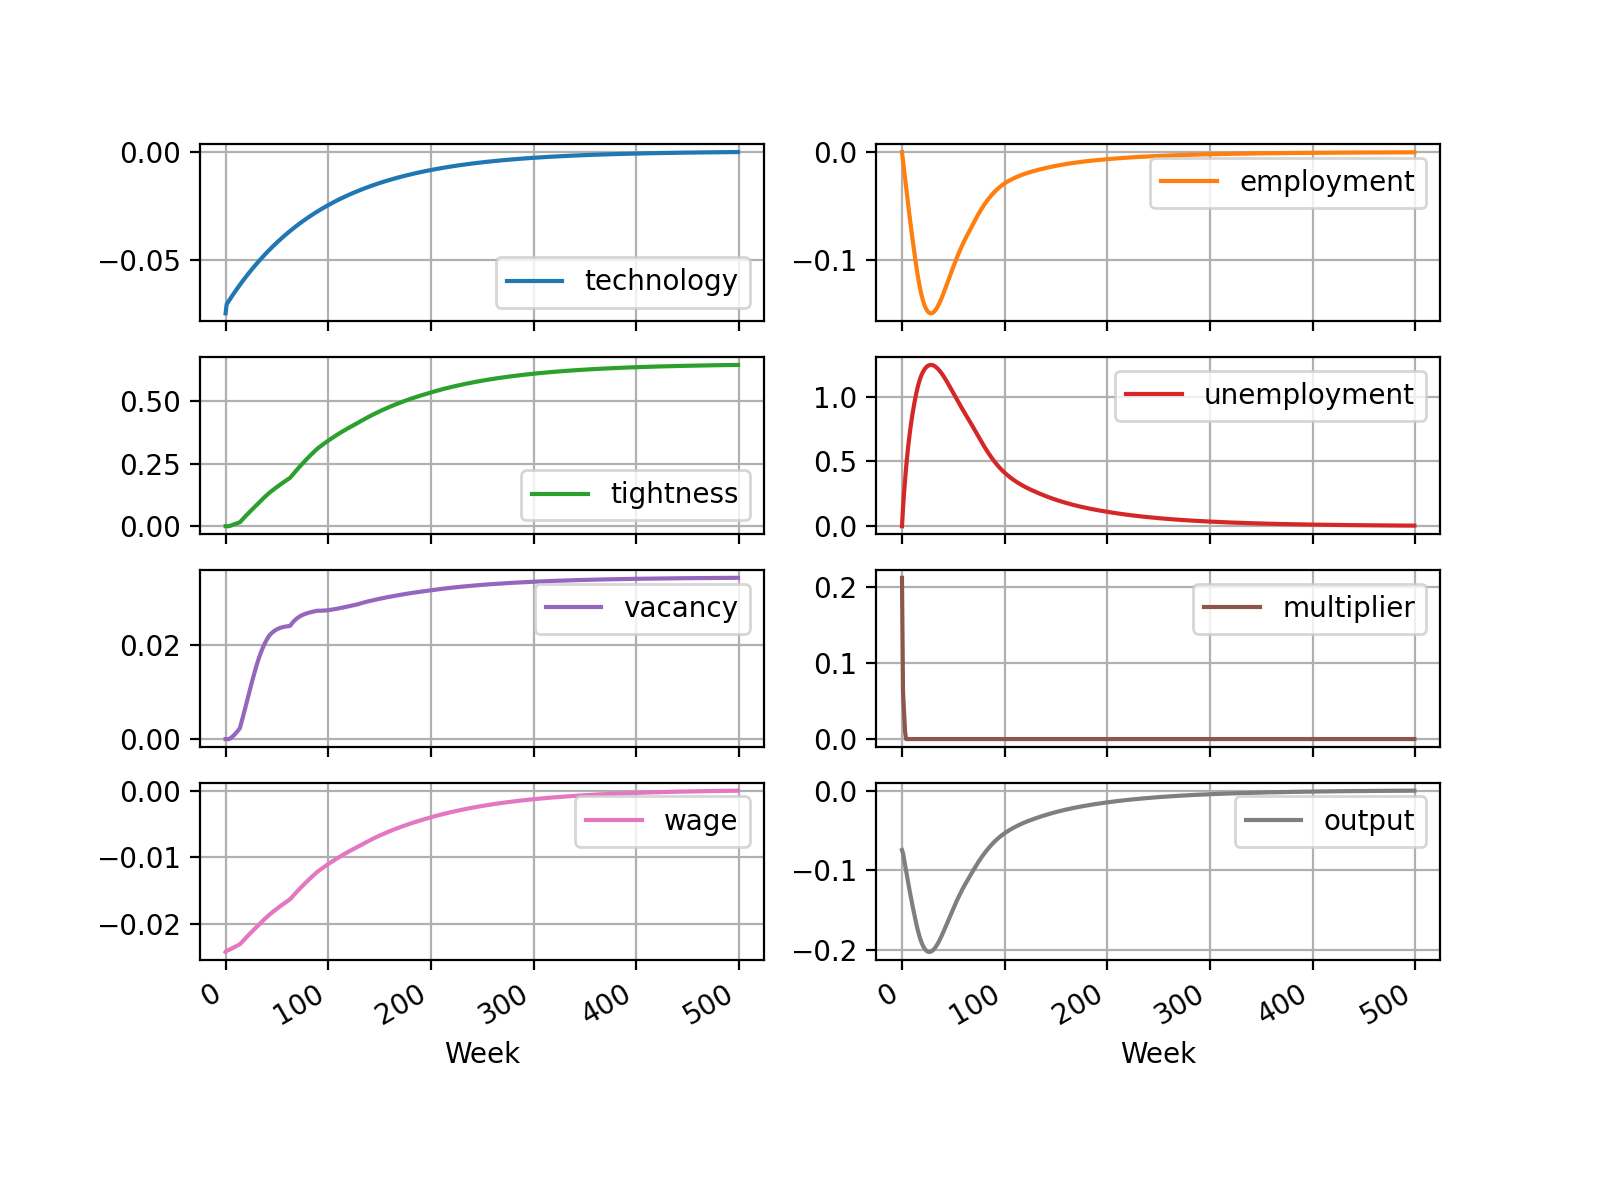

In [55]:
df.plot(subplots=True, 
           layout=(4,2),
           grid=True,
           figsize=(8,6),
           xlabel="Week",
          )
plt.show(block=False)

## Impulse response (stochastic)

We can also use the method ``ImpulseResponseFunction`` to generate synthetic time-series data.

In [36]:
model.σ

0.0034

Here's an ad-hoc example where the vacancy non-negativity constraint sometimes binds. 

We'll have to engineer large enough shocks (higher frequency of observing very negative log-productivity shocks).

We do so by manipulating the ``shock_scale`` setting in the simulation:

In [37]:
monty = ImpulseResponseFunction(model, polfun, X, 
                             Horizon=500*12*4, 
                             state_init=[0.0, 0.947273],
                             irf_percent=False,
                             experiment="stochastic", 
                             Burn=2001,
                             shock_scale=model.σ,
                             seed=1,
                            )

<IPython.core.display.Javascript object>


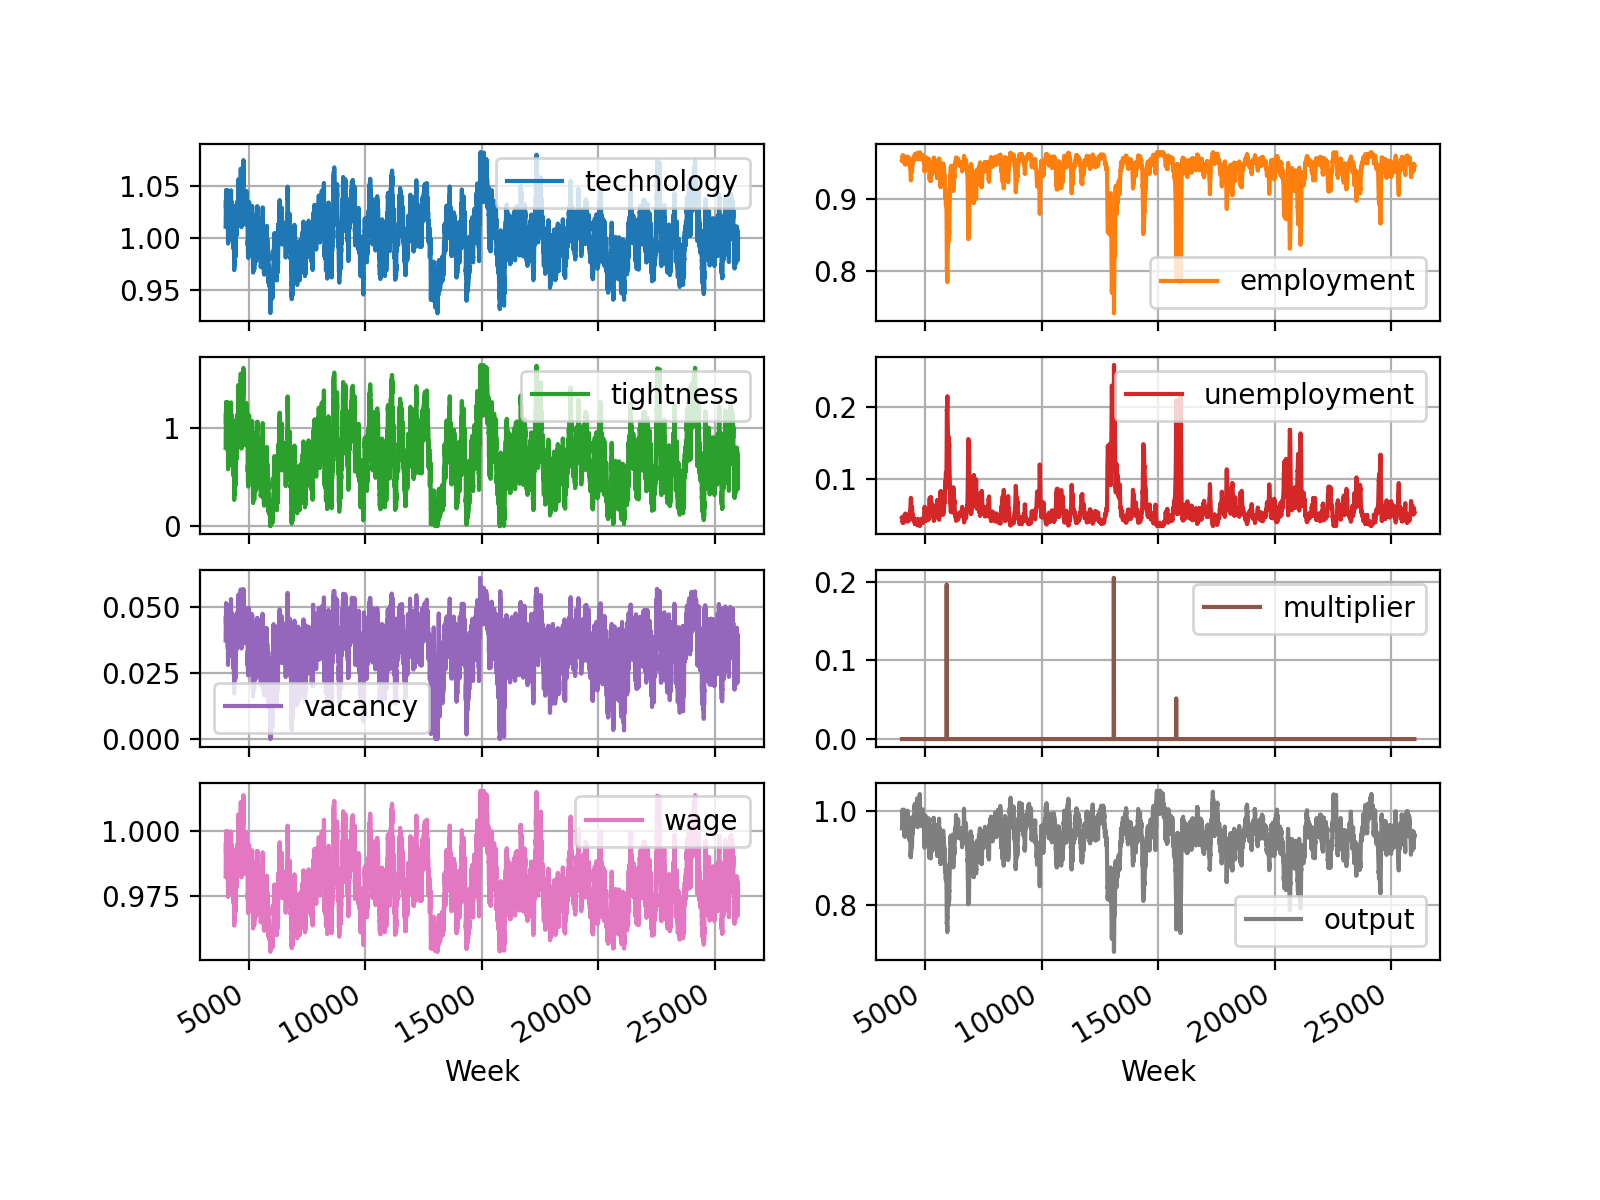

In [38]:
monty.plot(subplots=True, 
           layout=(4,2),
           grid=True,
           figsize=(8,6),
           xlabel="Week",
           legend=True,
          )
plt.show(block=False)

In [39]:
monty["multiplier"].value_counts(normalize=True)

0.000000    0.999455
0.205256    0.000045
0.138326    0.000045
0.144907    0.000045
0.085334    0.000045
0.071078    0.000045
0.051710    0.000045
0.196677    0.000045
0.142984    0.000045
0.120037    0.000045
0.078124    0.000045
0.128762    0.000045
0.096929    0.000045
Name: multiplier, dtype: float64

We can see that the non-negativity constraint on vacancies is binding in less than 0.1 percent of the time.

## Business-cycle statistics

We now replicate the steps from PNZ (and HM).

1. Do quarterly averages of the weekly data.

2. Define the data as proportional deviations from their respective means.

3. Get the cycle component the filter by HP filtering on quarterly series.

4. Calculate moments: standard deviations.

5. Calculate moments: contemporaneous Pearson correlations.

6. Calculate moments: first-order autocorrelations.



Instead of bootstrapping from the ergodic distribution, we will just illustrate this based on the one long simulation. (This assumes Birkhoff's ergodic theorem for Markov Processes holds here.)

### Quarterly averaging

We'll need to add some dummy weekly dates into the dataframe.

Let's take the last $12 \times 10^{3}$ observations:

In [40]:
Y = monty.tail(12000).copy()
Y

,technology,employment,tightness,unemployment,vacancy,multiplier,wage,output
14000,0.987923,0.939391,0.491416,0.060609,0.029784,0.0,0.971474,0.928046
14001,0.988755,0.939324,0.501930,0.060676,0.030455,0.0,0.971844,0.928762
14002,0.988728,0.939358,0.501587,0.060642,0.030417,0.0,0.971832,0.928770
14003,0.992842,0.939385,0.555037,0.060615,0.033644,0.0,0.973715,0.932661
14004,0.987058,0.939857,0.480472,0.060143,0.028897,0.0,0.971089,0.927693
...,...,...,...,...,...,...,...,...
25995,1.005189,0.947333,0.720216,0.052667,0.037932,0.0,0.979583,0.952249
25996,1.003606,0.947755,0.698911,0.052245,0.036515,0.0,0.978821,0.951173
25997,1.001094,0.947981,0.665026,0.052019,0.034594,0.0,0.977612,0.949018
25998,0.997410,0.947963,0.615904,0.052037,0.032049,0.0,0.975866,0.945508


In [41]:
date = pd.date_range(start='1900-01-01', end=None, periods=len(Y), freq='W')

In [42]:
Y["week starting"] = date
Y

,technology,employment,tightness,unemployment,vacancy,multiplier,wage,output,week starting
14000,0.987923,0.939391,0.491416,0.060609,0.029784,0.0,0.971474,0.928046,1900-01-07
14001,0.988755,0.939324,0.501930,0.060676,0.030455,0.0,0.971844,0.928762,1900-01-14
14002,0.988728,0.939358,0.501587,0.060642,0.030417,0.0,0.971832,0.928770,1900-01-21
14003,0.992842,0.939385,0.555037,0.060615,0.033644,0.0,0.973715,0.932661,1900-01-28
14004,0.987058,0.939857,0.480472,0.060143,0.028897,0.0,0.971089,0.927693,1900-02-04
...,...,...,...,...,...,...,...,...,...
25995,1.005189,0.947333,0.720216,0.052667,0.037932,0.0,0.979583,0.952249,2129-11-27
25996,1.003606,0.947755,0.698911,0.052245,0.036515,0.0,0.978821,0.951173,2129-12-04
25997,1.001094,0.947981,0.665026,0.052019,0.034594,0.0,0.977612,0.949018,2129-12-11
25998,0.997410,0.947963,0.615904,0.052037,0.032049,0.0,0.975866,0.945508,2129-12-18


Now we do a quarterly average transformation:

In [43]:
Q = Y.resample('Q', on='week starting').mean()
Q

,technology,employment,tightness,unemployment,vacancy,multiplier,wage,output
week starting,,,,,,,,
1900-03-31,0.984452,0.938520,0.448795,0.061480,0.027535,0.0,0.969978,0.923932
1900-06-30,0.987787,0.936368,0.490710,0.063632,0.031173,0.0,0.971453,0.924935
1900-09-30,0.982010,0.936315,0.418808,0.063685,0.026672,0.0,0.968923,0.919471
1900-12-31,0.990188,0.935026,0.523596,0.064974,0.033720,0.0,0.972621,0.925875
1901-03-31,1.011793,0.948787,0.809463,0.051213,0.041461,0.0,0.982801,0.959976
...,...,...,...,...,...,...,...,...
2128-12-31,1.000539,0.944214,0.657878,0.055786,0.036594,0.0,0.977365,0.944731
2129-03-31,1.002953,0.948942,0.690213,0.051058,0.035238,0.0,0.978517,0.951744
2129-06-30,0.996480,0.947409,0.604923,0.052591,0.031739,0.0,0.975492,0.944079


### De-mean the data

In [44]:
Q.mean()

technology      1.001848
employment      0.941927
tightness       0.685481
unemployment    0.058073
vacancy         0.034671
multiplier      0.000004
wage            0.978495
output          0.944076
dtype: float64

Define the data as proportional deviations from their respective means:

In [45]:
Q = Q.divide(Q.mean())

In [46]:
Q.head()

,technology,employment,tightness,unemployment,vacancy,multiplier,wage,output
week starting,,,,,,,,
1900-03-31,0.982636,0.996382,0.654716,1.058675,0.794199,0.0,0.991295,0.978663
1900-06-30,0.985965,0.994097,0.715863,1.095738,0.899114,0.0,0.992803,0.979726
1900-09-30,0.980198,0.994042,0.610969,1.096635,0.769297,0.0,0.990218,0.973937
1900-12-31,0.988362,0.992673,0.763837,1.118843,0.972580,0.0,0.993997,0.980721
1901-03-31,1.009927,1.007282,1.180869,0.881880,1.195857,0.0,1.004401,1.016842


### HP filter quarterly series

Compute HP-filtered time series statistics:

In [47]:
Y_cycle = {}
Y_trend = {}
for key, series in Q.iteritems():
    Y_cycle[key], Y_trend[key] = sm.tsa.filters.hpfilter(series, 1600)
Y_cycle = pd.DataFrame.from_dict(Y_cycle)
Y_trend = pd.DataFrame.from_dict(Y_trend)

It's always good to visually inspect the transformed series:

<IPython.core.display.Javascript object>


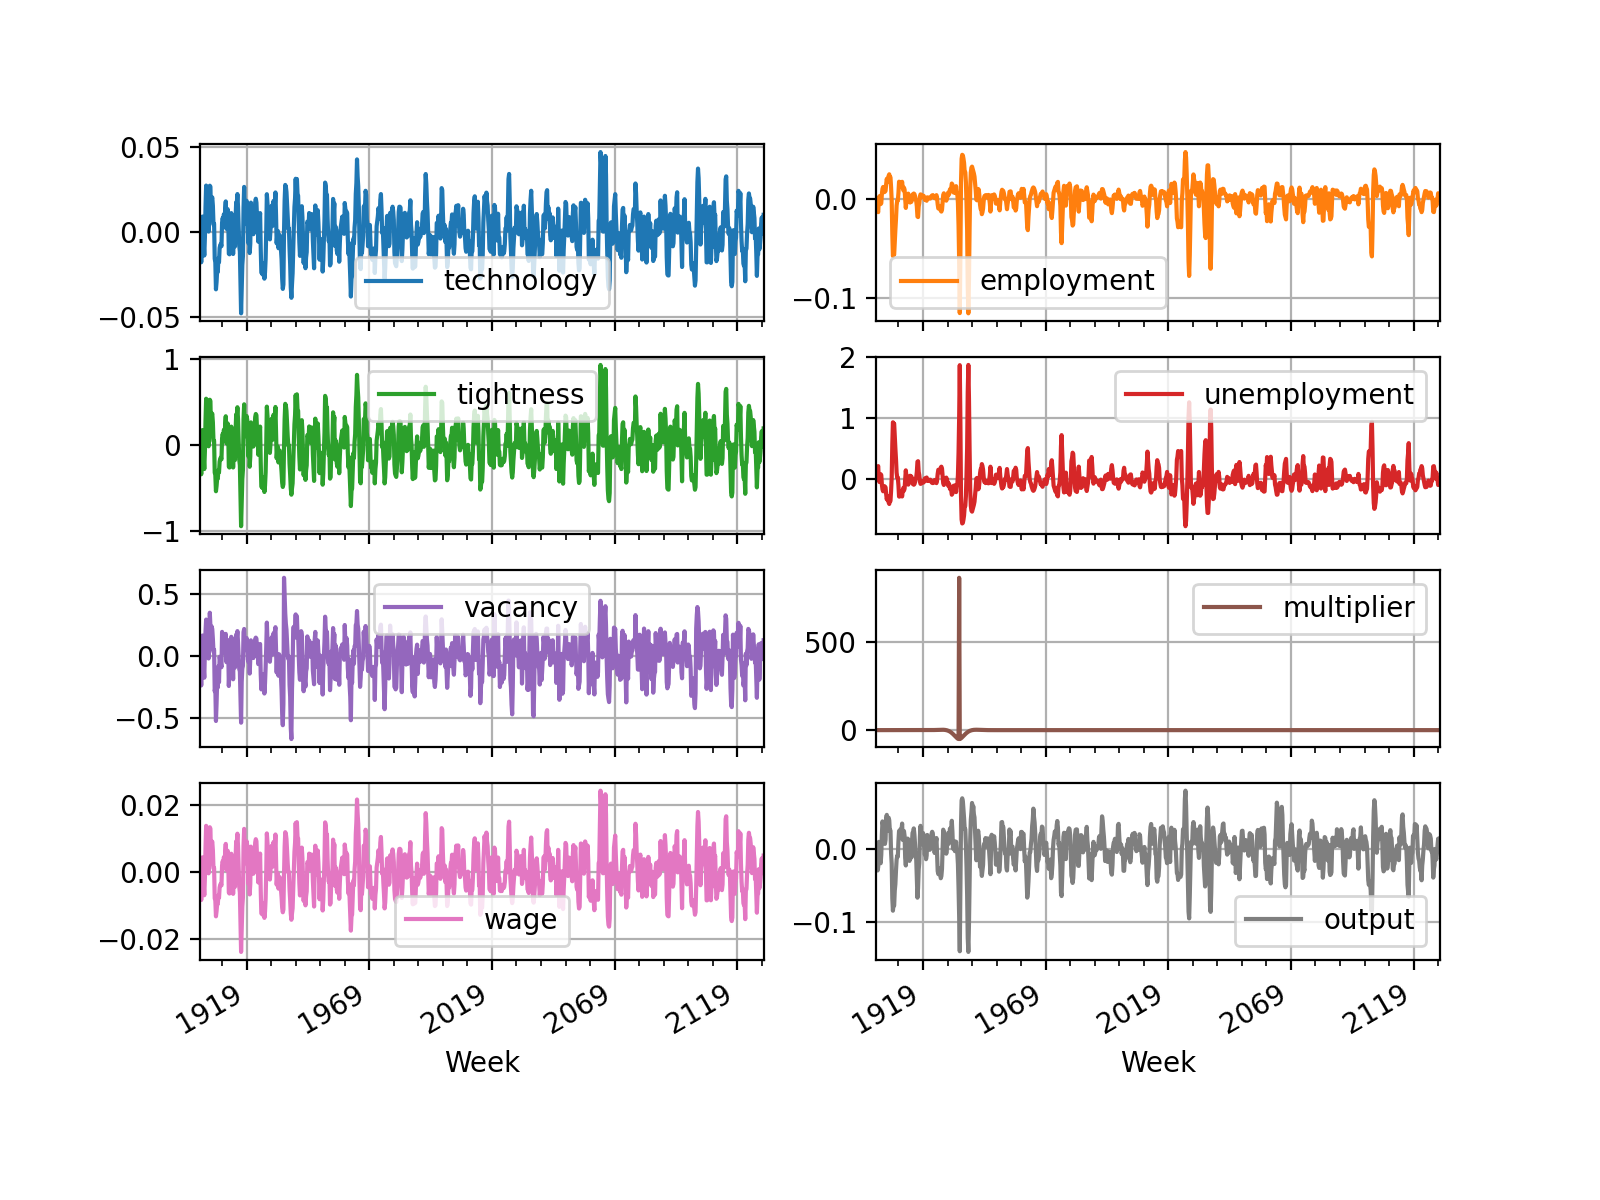

In [48]:
Y_cycle.plot(subplots=True, 
           layout=(4,2),
           grid=True,
           figsize=(8,6),
           xlabel="Week",
           legend=True,
          )
plt.show(block=False)

<IPython.core.display.Javascript object>


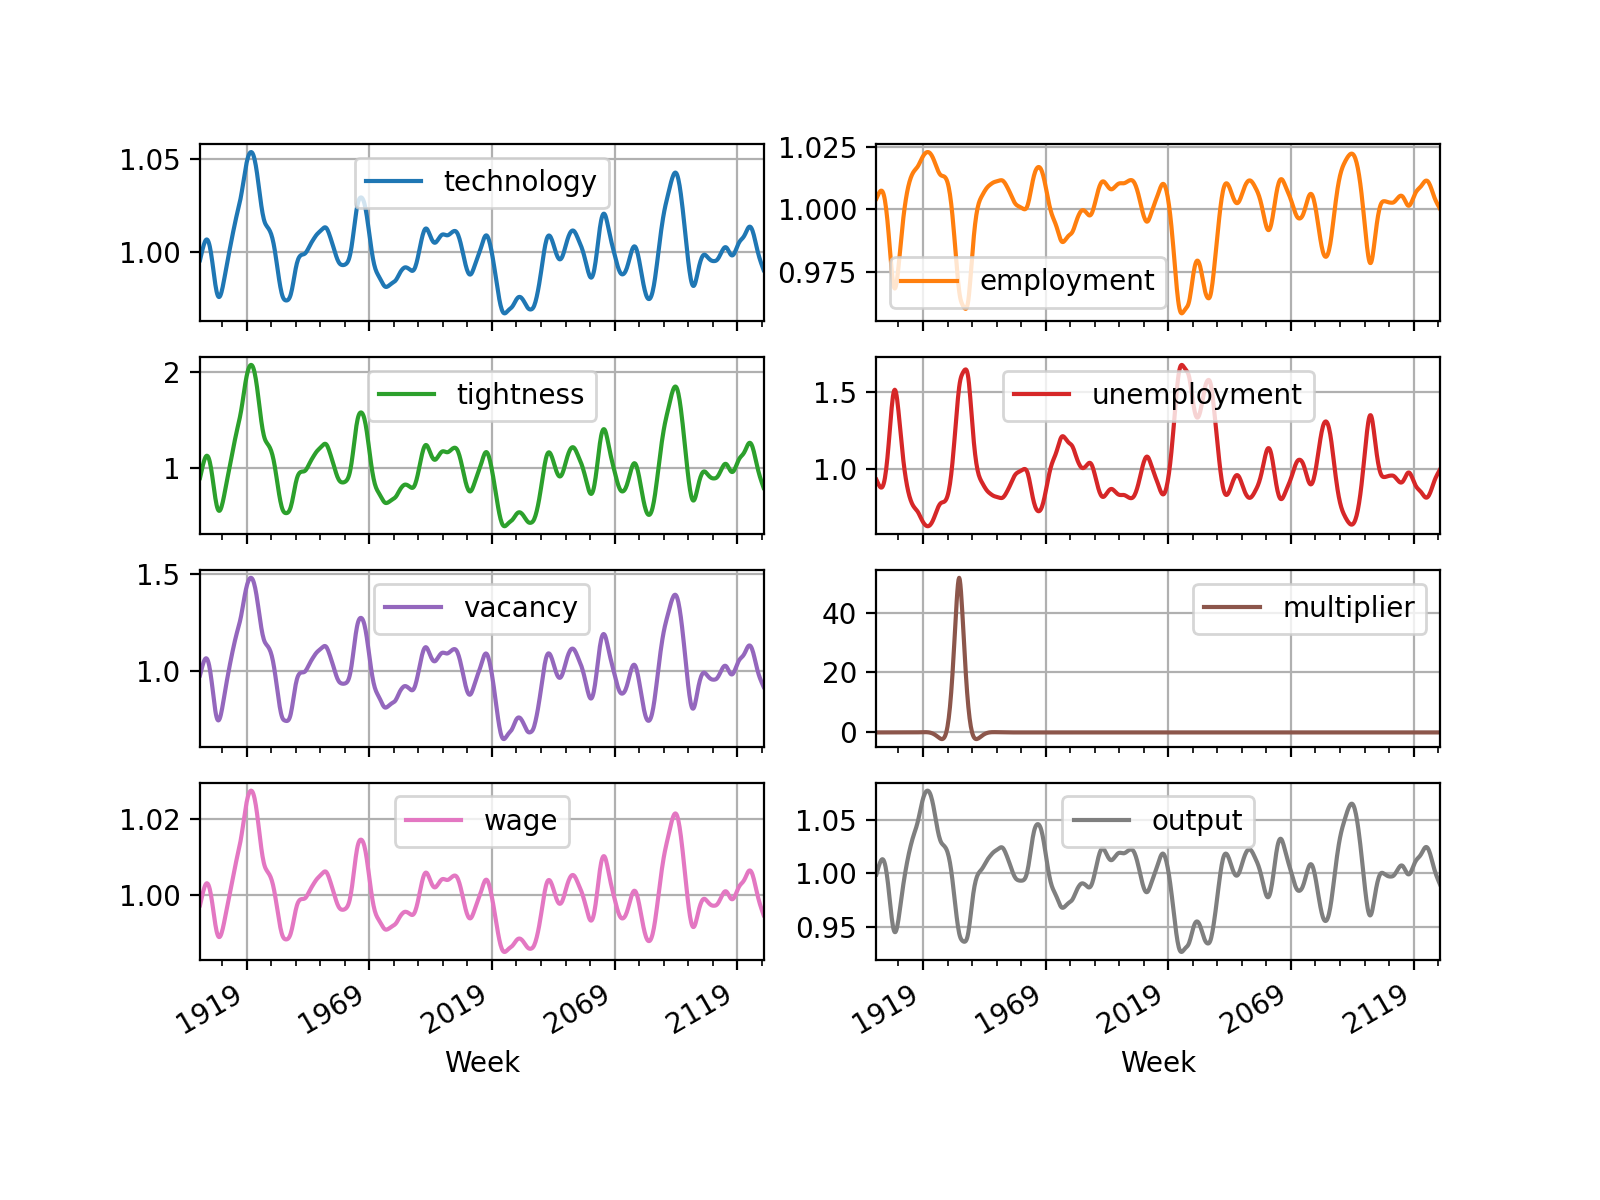

In [49]:
Y_trend.plot(subplots=True, 
           layout=(4,2),
           grid=True,
           figsize=(8,6),
           xlabel="Week",
           legend=True,
          )
plt.show(block=False)

### Statistics - volatility

In [50]:
std = {}
for key, series in Y_cycle.iteritems():
    std[key] = series.std()
std = pd.DataFrame.from_dict(std, orient='index', columns=["standard deviation"])

In [51]:
std

,standard deviation
technology,0.013984
employment,0.014982
tightness,0.264701
unemployment,0.243001
vacancy,0.166283
multiplier,29.263703
wage,0.006680
output,0.026398


### Statistics - comovement

First let's view the scatter plots of the filtered data.

In [99]:
def seaborn_jointplot(x_key, y_key, df, xlabel=None, ylabel=None):
    """Custom wrapper to do seaborn jointplots"""
    g = (sns.jointplot(x_key, y_key, 
                      data=df, 
                      kind="reg",
                      color ="blue",
                      marker="+",
                      joint_kws = {'scatter_kws':dict(alpha=0.2)}
                  )
    ).plot_joint(sns.kdeplot, zorder=0, n_levels=6)
    if xlabel != None:
        g.ax_joint.set_xlabel(xlabel)
    if ylabel != None:
        g.ax_joint.set_ylabel(ylabel)

<IPython.core.display.Javascript object>


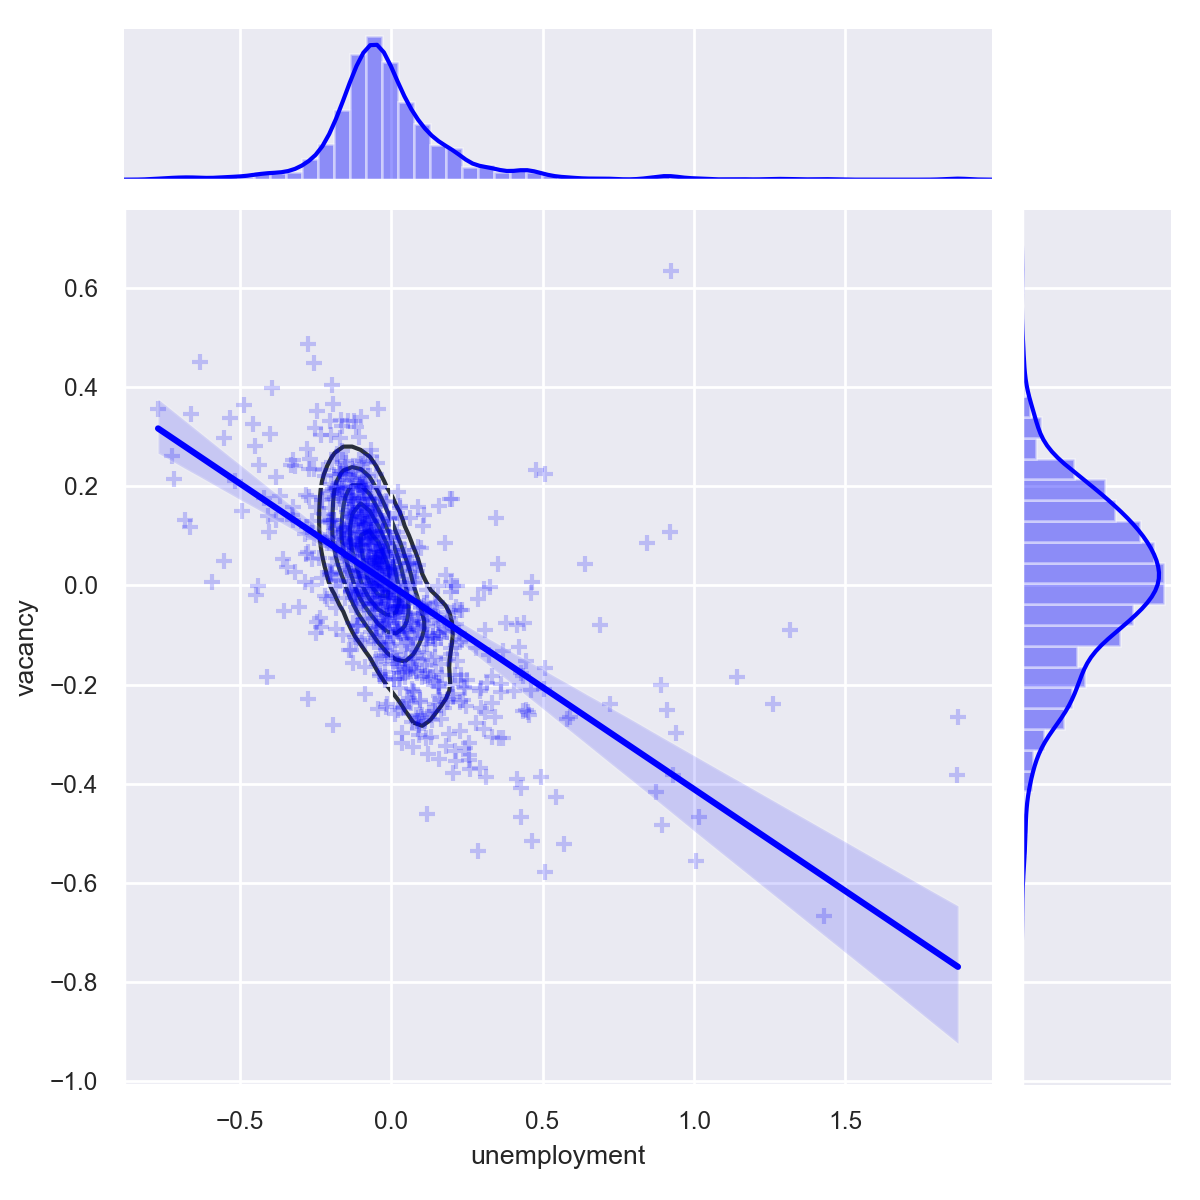

In [100]:
seaborn_jointplot("unemployment", "vacancy")

<IPython.core.display.Javascript object>


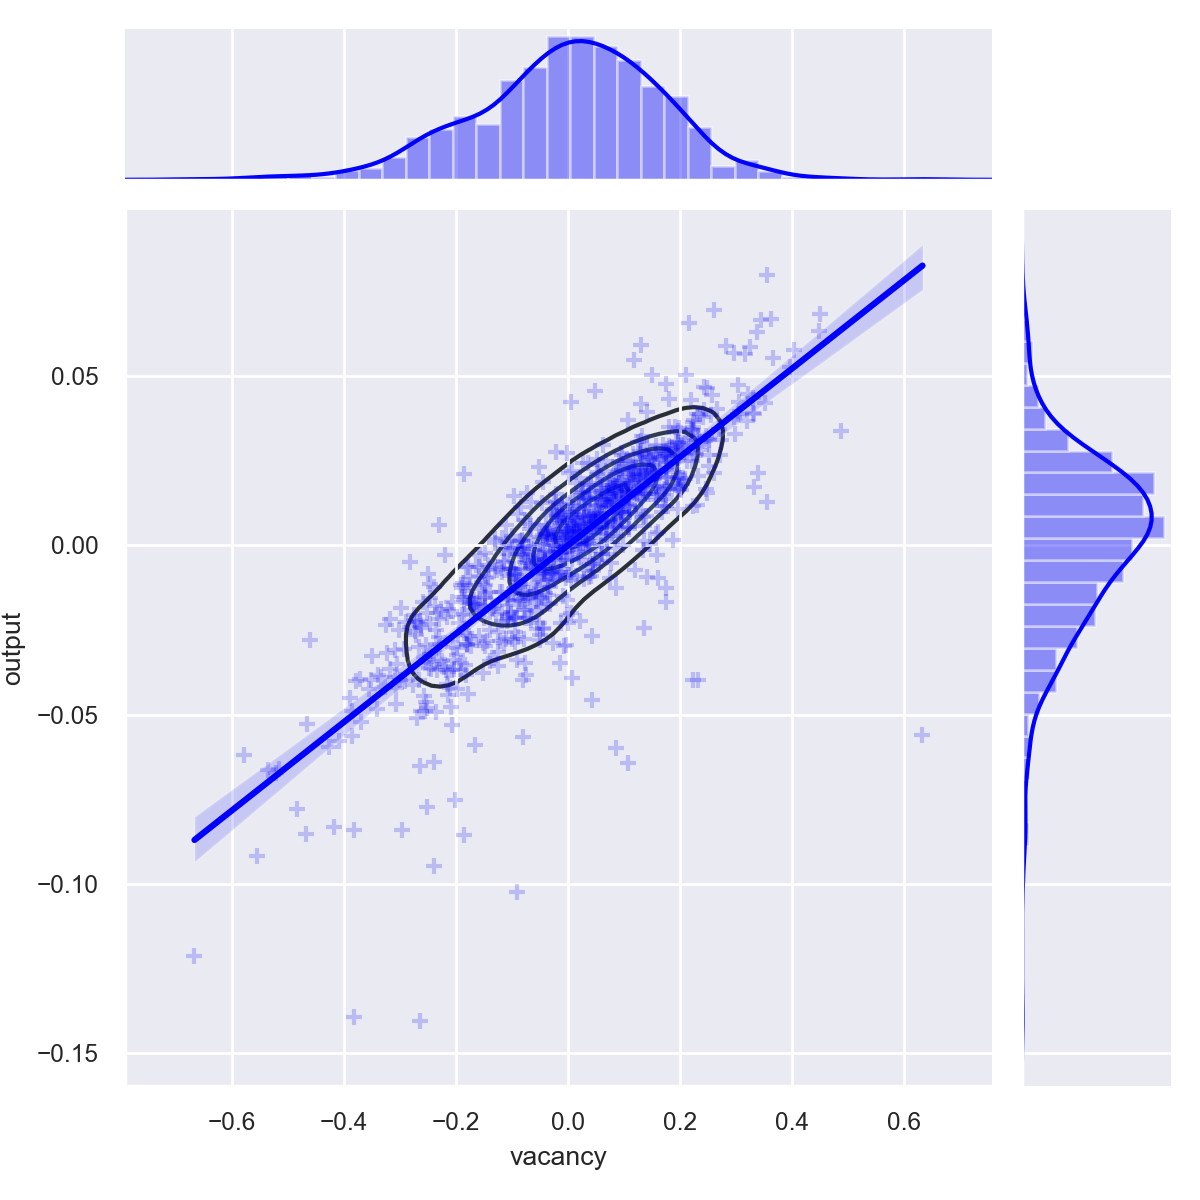

In [102]:
seaborn_jointplot("vacancy", "output")

<IPython.core.display.Javascript object>


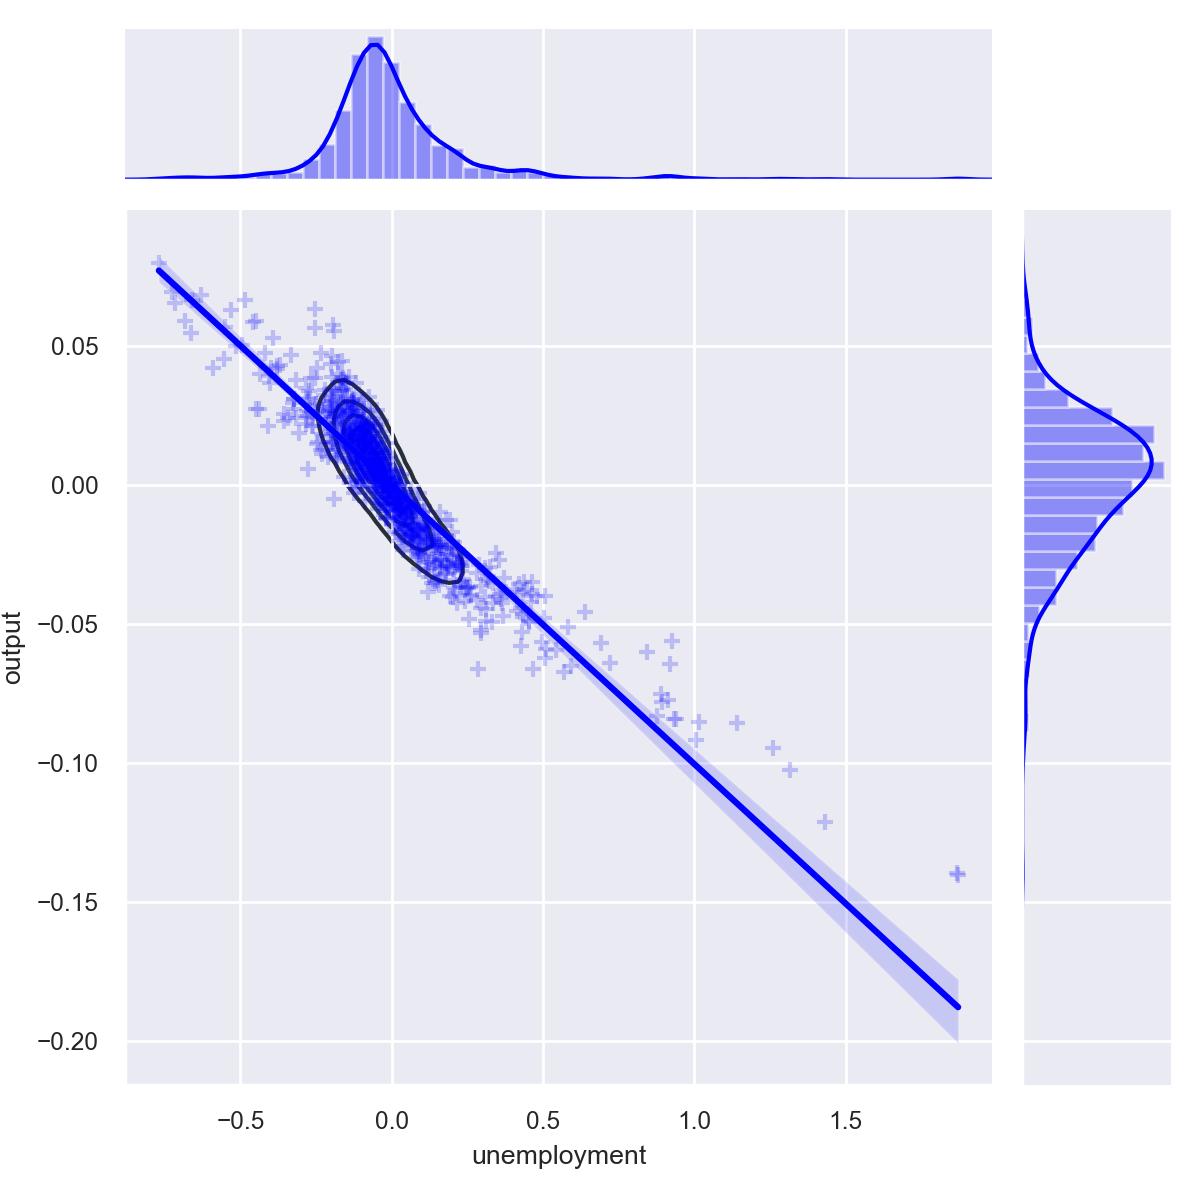

In [103]:
seaborn_jointplot("unemployment", "output")

<IPython.core.display.Javascript object>


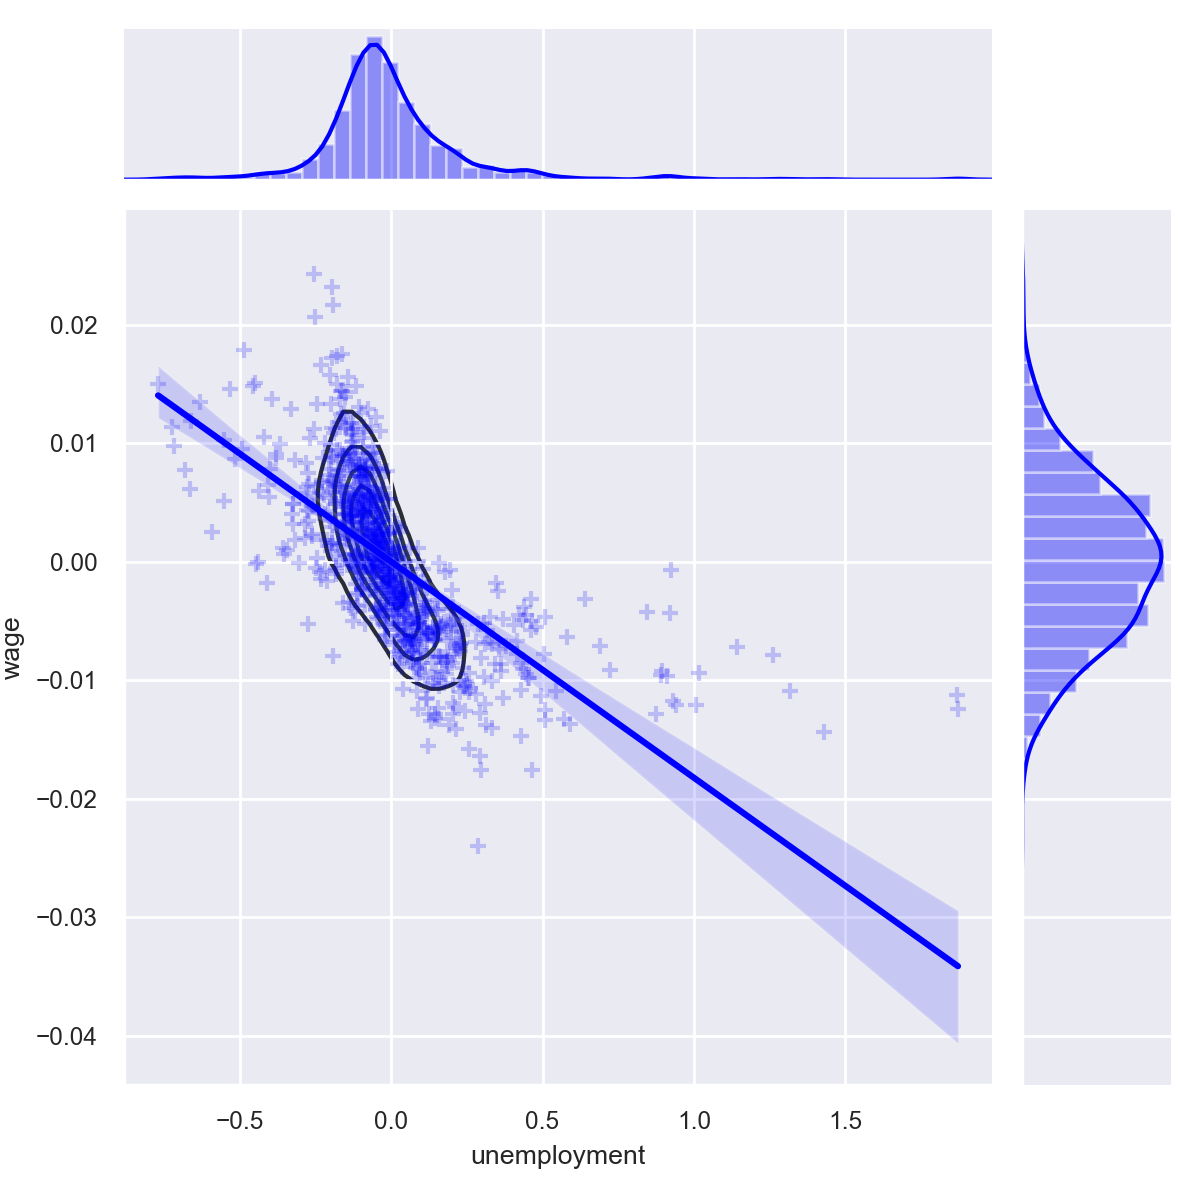

In [104]:
seaborn_jointplot("unemployment", "wage")

Or we can summarize comovements in terms of the time series' cross-correlation functions. 

Below we report just the contemporaneous cross correlations.

In [52]:
Y_cycle.corr()

,technology,employment,tightness,unemployment,vacancy,multiplier,wage,output
technology,1.000000,0.712223,0.996918,-0.712223,0.923872,-0.075266,0.995788,0.927060
employment,0.712223,1.000000,0.671242,-1.000000,0.600214,-0.133755,0.663092,0.923359
tightness,0.996918,0.671242,1.000000,-0.671242,0.909625,-0.056082,0.999741,0.903947
unemployment,-0.712223,-1.000000,-0.671242,1.000000,-0.600214,0.133755,-0.663092,-0.923359
vacancy,0.923872,0.600214,0.909625,-0.600214,1.000000,-0.108393,0.905974,0.822158
multiplier,-0.075266,-0.133755,-0.056082,0.133755,-0.108393,1.000000,-0.055326,-0.110668
wage,0.995788,0.663092,0.999741,-0.663092,0.905974,-0.055326,1.000000,0.899038
output,0.927060,0.923359,0.903947,-0.923359,0.822158,-0.110668,0.899038,1.000000


Let's utilize ``seaborn`` and make this easier to read and visualize:

<IPython.core.display.Javascript object>


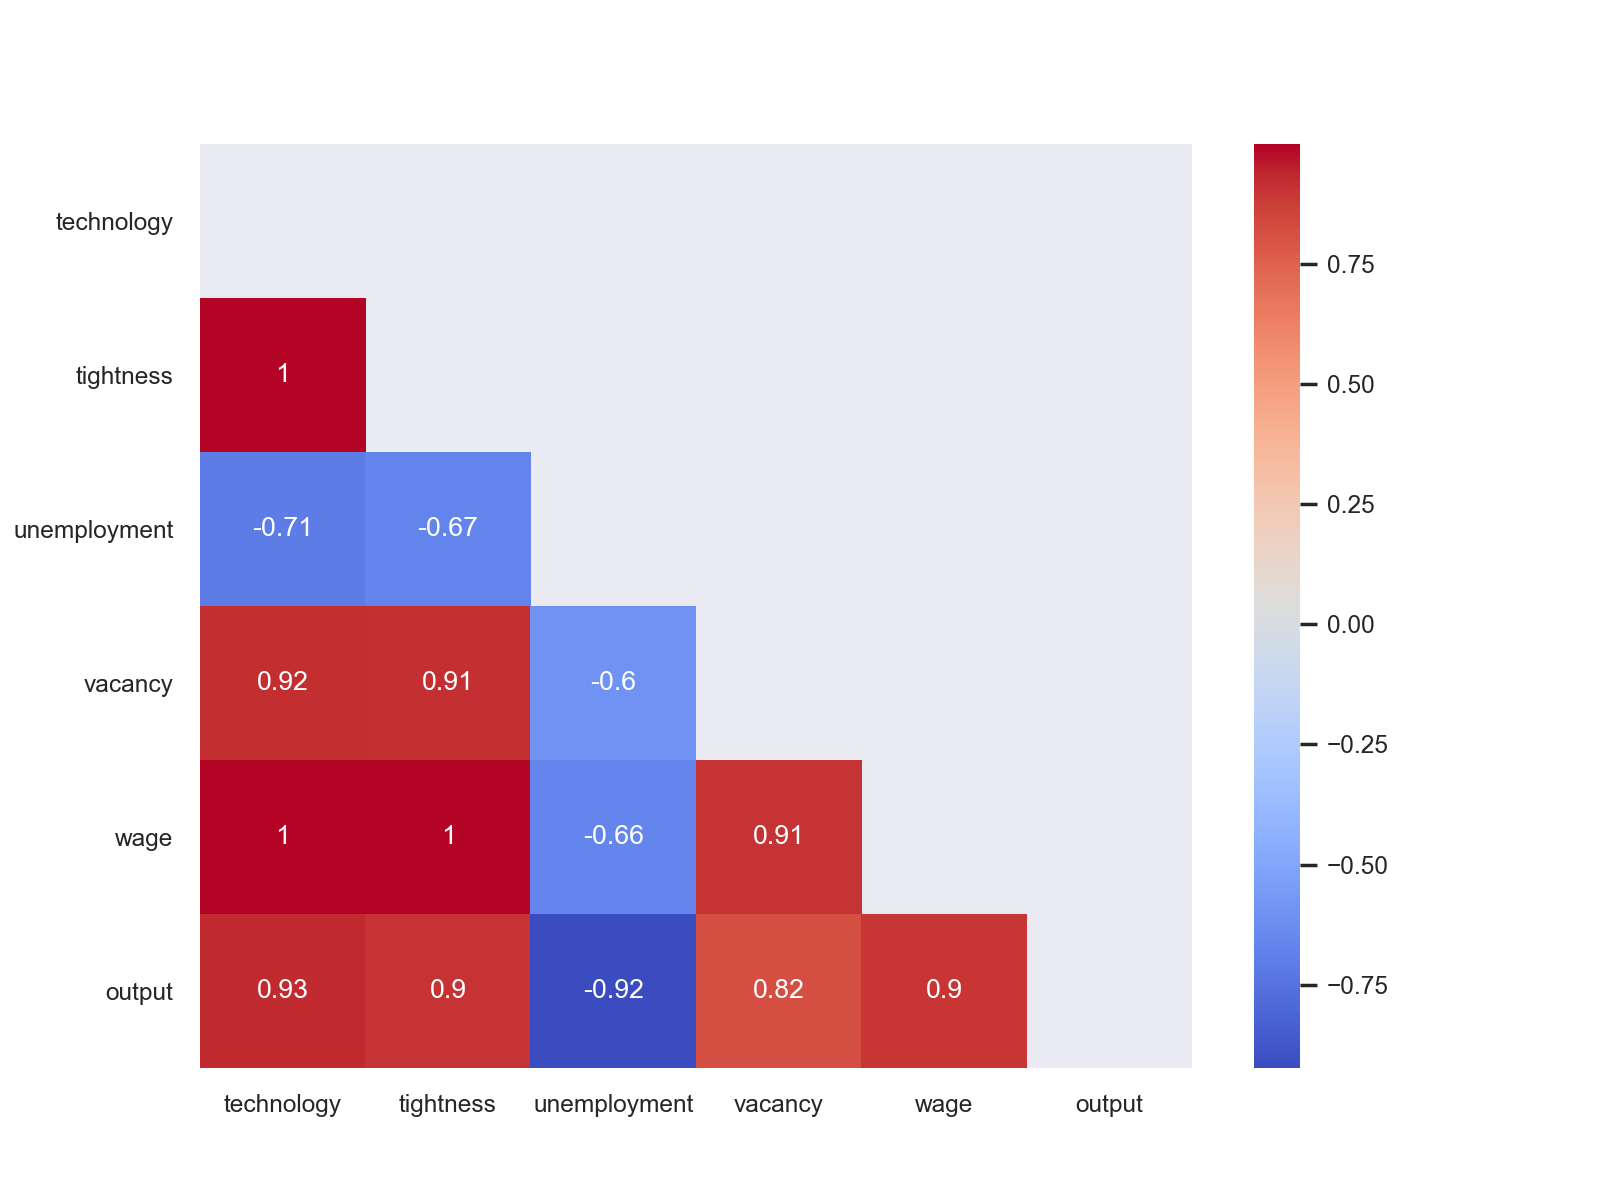

In [76]:
# Don't show correlations with λ and N
Y_select = Y_cycle.drop(columns=["multiplier", "employment"])
# Get the upper triangular of table
matrix = np.triu(Y_select.corr())
# Mask/hide upper triangular duplicate
plt.figure(figsize=(8,6))
sns.set(font_scale = 0.8)
sns.heatmap(Y_select.corr(), annot=True, cmap= 'coolwarm', mask=matrix)
plt.show(block=False)

### Statistics - persistence

In [53]:
autocorr1 = {}
for key, series in Y_cycle.iteritems():
    autocorr1[key] = series.autocorr(lag=1)
acf_1 = pd.DataFrame.from_dict(autocorr1, orient='index', columns=["ACF(1)"])

In [54]:
acf_1

,ACF(1)
technology,0.767661
employment,0.822654
tightness,0.766458
unemployment,0.822654
vacancy,0.631677
multiplier,-0.074168
wage,0.765539
output,0.814575


# Postscript

*Et voila*, we have replicated (quite closely) Panel D of Table 1 in PNZ.